In [2]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

data = pd.read_csv('dataDraft1.csv', index_col=0)
data

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Height,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,Left,Forward,170.2,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,Right,Forward,188.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,Right,Forward,175.3,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
193080,De Gea,27,Spain,91,93,Manchester United,72000.0,Right,GK,193.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,Right,MidFielder,180.3,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,Right,MidFielder,175.3,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,Right,Forward,190.5,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
241638,B. Worman,16,England,47,67,Cambridge United,60.0,Right,Forward,172.7,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0


In [3]:
data.iloc[3169, :]

Name                          I. Damonte
Age                                   36
Nationality                    Argentina
Overall                               72
Potential                             72
Club               Club Atlético Huracán
Value                              975.0
Preferred Foot                     Right
Position                      MidFielder
Height                             175.3
Weight                              72.2
Crossing                            67.0
Finishing                           64.0
HeadingAccuracy                     75.0
ShortPassing                        72.0
Volleys                             56.0
Dribbling                           70.0
Curve                               57.0
FKAccuracy                          61.0
LongPassing                         71.0
BallControl                         72.0
Acceleration                        66.0
SprintSpeed                         50.0
Agility                             69.0
Reactions       

In [3]:
pot_overall = data.iloc[:, [3, 4]]

In [4]:
import numpy as np
from fcmeans import FCM
my_model = FCM(n_clusters=3) # we use two cluster as an example
my_model.fit(pot_overall.to_numpy()) ## X, numpy array. rows:samples columns:features

In [5]:
centers = my_model.centers
labels = my_model.predict(pot_overall.to_numpy())

In [6]:
type(labels)

numpy.ndarray

In [4]:
data['Position'].to_numpy()

array(['Forward', 'Forward', 'Forward', ..., 'Forward', 'Forward',
       'MidFielder'], dtype=object)

In [7]:
data.iloc[:, 0]

ID
158023              L. Messi
20801      Cristiano Ronaldo
190871             Neymar Jr
193080                De Gea
192985          K. De Bruyne
                 ...        
238813          J. Lundstram
243165    N. Christoffersson
241638             B. Worman
246268        D. Walker-Rice
246269             G. Nugent
Name: Name, Length: 17918, dtype: object

In [8]:
plot_data = pd.DataFrame(data.iloc[:, [0, 3, 4]], columns=['Name', 'Overall', 'Potential'])
plot_data

,Name,Overall,Potential
ID,,,
158023,L. Messi,94,94
20801,Cristiano Ronaldo,94,94
190871,Neymar Jr,92,93
193080,De Gea,91,93
192985,K. De Bruyne,91,92
...,...,...,...
238813,J. Lundstram,47,65
243165,N. Christoffersson,47,63
241638,B. Worman,47,67


In [9]:
name_label = plot_data
name_label['Label'] = labels
name_label

,Name,Overall,Potential,Label
ID,,,,
158023,L. Messi,94,94,2
20801,Cristiano Ronaldo,94,94,2
190871,Neymar Jr,92,93,2
193080,De Gea,91,93,2
192985,K. De Bruyne,91,92,2
...,...,...,...,...
238813,J. Lundstram,47,65,0
243165,N. Christoffersson,47,63,0
241638,B. Worman,47,67,0


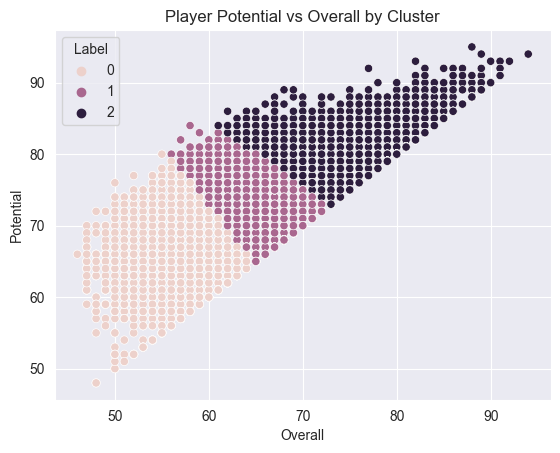

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# assuming you have a dataframe named 'df' with columns 'Potential', 'Overall' and 'Cluster'
sns.scatterplot(x=name_label['Overall'], y=name_label['Potential'], hue=name_label['Label'], data=name_label)
plt.title('Player Potential vs Overall by Cluster')
plt.show()

In [27]:
lab = pd.DataFrame(name_label['Label'])
lab.count()
# label0 = []
# label1 = []
# label2 = []
# for i in range(len(name_label)):
#     if name_label[i]['Label'] == 0:
#         label0.append(i)
#     elif name_label[i]['Label'] == 1:
#         label1.append(i)
#     elif name_label[i]['Label'] == 2:
#         label2.append(i)

ValueError: No axis named 2 for object type DataFrame

In [14]:
changer = {
    2: 'GK',
    3: 'Defender',
    1: 'Forward',
    0: 'MidFielder'
}

y_true = data['Position'].to_numpy()

y_pred = []
for i in labels:
    y_pred.append(changer[i])
y_pred = np.array(y_pred)

In [15]:
def count(true, pred):
    true_count = 0
    false_count = 0

    for i in range(len(pred)):
        if true[i] == pred[i]:
            true_count += 1
        else:
            false_count += 1

    print(f"Correct Answer: {true_count}")
    print(f"False  Answers: {false_count}")

    list0 = []
    list1 = []
    list2 = []
    list3 = []

    for i in range(len(pred)):
        if pred[i] == 0:
            list0.append(i)
        elif pred[i] == 1:
            list1.append(i)
        elif pred[i] == 2:
            list2.append(i)
        elif pred[i] == 3:
            list3.append(i)

In [16]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
print(f'Accuracy: {acc}')
count(y_true, y_pred)

Accuracy: 0.288536667038732
Correct Answer: 5170
False  Answers: 12748


In [13]:
import numpy as np
from fcmeans import FCM

dataLess = data.iloc[:,12:]
my_model = FCM(n_clusters=4)  # we use two cluster as an example
my_model.fit(dataLess.to_numpy())  ## X, numpy array. rows:samples columns:features
centers = my_model.centers
labels = my_model.predict(dataLess.to_numpy())

In [62]:
labels

array([3, 3, 3, ..., 3, 3, 2], dtype=int64)

In [63]:
data['Position'].to_numpy()

array(['Forward', 'Forward', 'Forward', ..., 'Forward', 'Forward',
       'MidFielder'], dtype=object)

In [65]:
changer = {
    1: 'GK',
    2: 'Defender',
    3: 'Forward',
    0: 'MidFielder'
}

y_true2 = data['Position'].to_numpy()

y_pred2 = []
for i in labels:
    y_pred2.append(changer[i])
y_pred2 = np.array(y_pred)

In [66]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true2, y_pred2)
print(f'Accuracy: {acc}')
count(y_true2, y_pred2)

Accuracy: 0.6966179261078246
Correct Answer: 12482
False  Answers: 5436


In [68]:
data.iloc[:,12:]

,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,,,,,,,,,,,,,,,,,,,,,
158023,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
20801,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
190871,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
193080,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
192985,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
243165,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
241638,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
